In [2]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [3]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dir_name_train_Demented = 'Dataset/train/Demented'
dir_name_train_NonDemented = 'Dataset/train/NonDemented'


In [6]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [7]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for Demented:

 ====== Images in:  Dataset/train/Demented
images_count:	200
min_width:	176
max_width:	208
min_height:	208
max_height:	208



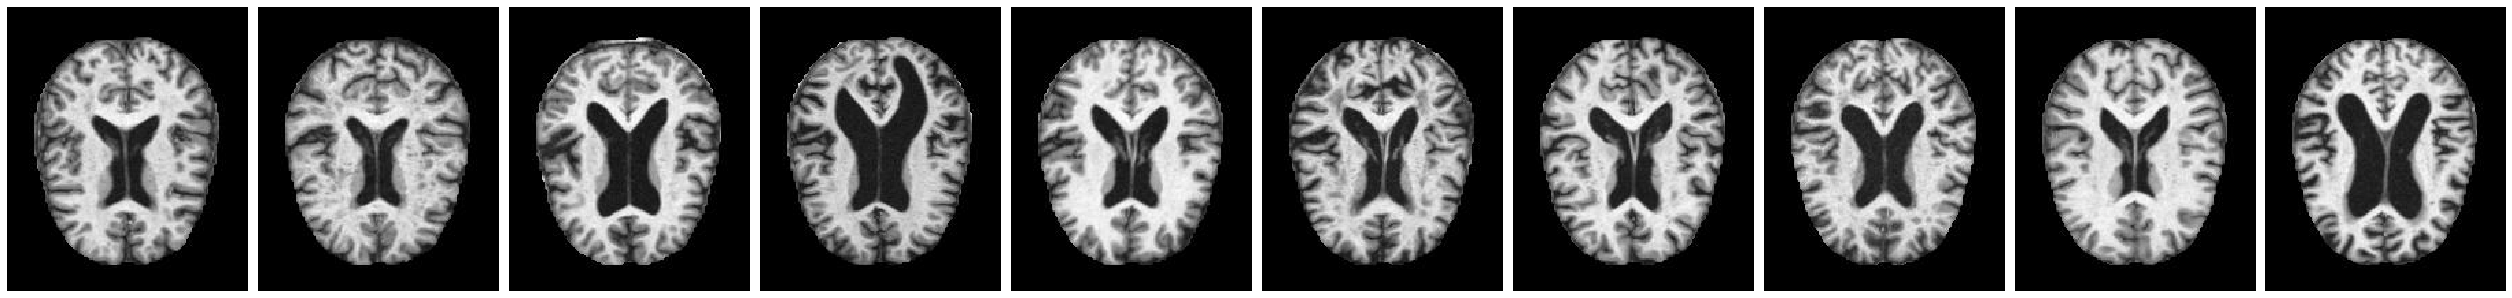

In [8]:
print("")
print("Trainned data for Demented:")
print("")
Images_details(dir_name_train_Demented)
print("")
plot_images(dir_name_train_Demented, 10)


Trainned data for NonDemented:

 ====== Images in:  Dataset/train/NonDemented
images_count:	187
min_width:	176
max_width:	208
min_height:	208
max_height:	208



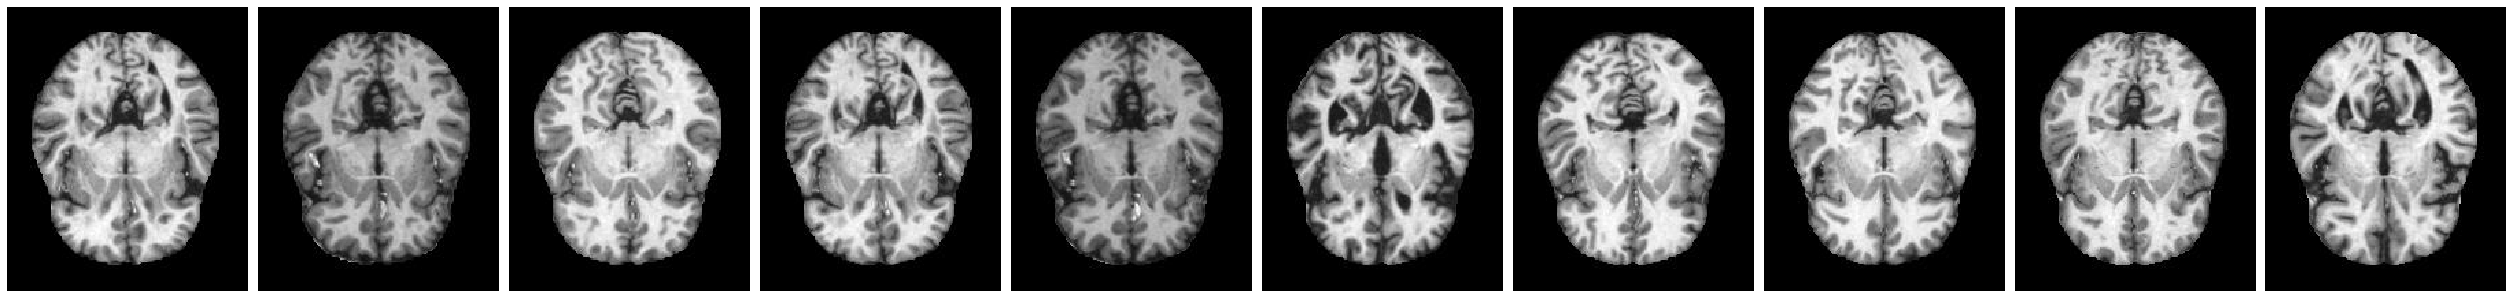

In [9]:
print("")
print("Trainned data for NonDemented:")
print("")
Images_details(dir_name_train_NonDemented)
print("")
plot_images(dir_name_train_NonDemented, 10)

In [10]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(208,208,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [11]:
Classifier.add(Dense(2, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(208,208),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(208,208),batch_size=32,class_mode='categorical')

Found 387 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [14]:
img_dims = 150
epochs = 10
batch_size = 32

In [15]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/10
12/12 [==============================] - 21s 1s/step - loss: 4.3903 - accuracy: 0.6732 - val_loss: 0.0897 - val_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 0.6695 - accuracy: 0.8028 - val_loss: 0.7587 - val_accuracy: 0.5417
Epoch 3/10
12/12 [==============================] - 16s 1s/step - loss: 0.0819 - accuracy: 0.9690 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 16s 1s/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 16s 1s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 16s 1s/step - loss: 0.4568 - accuracy: 0.9268 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 16s 1s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 8/10
12/12 [==

In [16]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

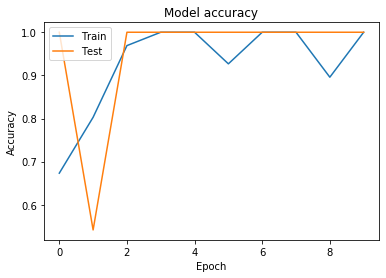

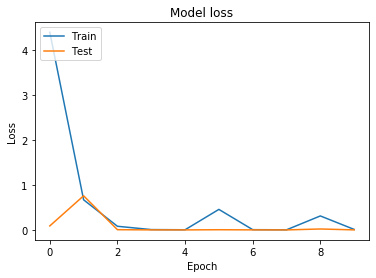

In [17]:
graph()